# Project 1
## Treyson Grange & Sayali Sali 

treyson.grange@usu.edu or treyson.grange@outlook.com

# First I'm doing some loading and taking a look at our data to find things to analyze

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
#Just comment out what you don't need 
# allStarFull = pd.read_csv('baseball/core/AllstarFull.csv')
# display(allStarFull.head())

# appearances = pd.read_csv('baseball/core/Appearances.csv')
# display(appearances.head())

# awardsManagers = pd.read_csv('baseball/core/AwardsManagers.csv')
# display(awardsManagers.head())

# awardsPlayers = pd.read_csv('baseball/core/AwardsPlayers.csv')
# display(awardsPlayers.head())

# awardsShareManagers = pd.read_csv('baseball/core/AwardsShareManagers.csv') 
# display(awardsShareManagers.head())

# awardsSharePlayers = pd.read_csv('baseball/core/AwardsSharePlayers.csv')
# display(awardsSharePlayers.head())

# batting = pd.read_csv('baseball/core/Batting.csv')
# display(batting.head())

# battingPost = pd.read_csv('baseball/core/BattingPost.csv')
# display(battingPost.head())

# collegePlaying = pd.read_csv('baseball/core/CollegePlaying.csv')
# display(collegePlaying.head())

# fielding = pd.read_csv('baseball/core/Fielding.csv')
# display(fielding.head())

# fieldingOF = pd.read_csv('baseball/core/FieldingOF.csv')
# display(fieldingOF.head())

# fieldingOFsplit = pd.read_csv('baseball/core/FieldingOFsplit.csv')
# display(fieldingOFsplit.head())

# fieldingPost = pd.read_csv('baseball/core/FieldingPost.csv')
# display(fieldingPost.head())

# hallOfFame = pd.read_csv('baseball/core/HallOfFame.csv')
# display(hallOfFame.head())

# homeGames = pd.read_csv('baseball/core/HomeGames.csv')
# display(homeGames.head())

# managers = pd.read_csv('baseball/core/Managers.csv')
# display(managers.head())

# managersHalf = pd.read_csv('baseball/core/ManagersHalf.csv')
# display(managersHalf.head())

# parks = pd.read_csv('baseball/core/Parks.csv')
# display(parks.head())

# people = pd.read_csv('baseball/core/People.csv')
# display(people.head())

# pitching = pd.read_csv('baseball/core/Pitching.csv')
# display(pitching.head())

# pitchingPost = pd.read_csv('baseball/core/PitchingPost.csv')
# display(pitchingPost.head())

# salaries = pd.read_csv('baseball/core/Salaries.csv')
# display(salaries.head())

# schools = pd.read_csv('baseball/core/Schools.csv')
# display(schools.head())

# seriesPost = pd.read_csv('baseball/core/SeriesPost.csv')
# display(seriesPost.head())

# teams = pd.read_csv('baseball/core/Teams.csv')
# display(teams.head())

# teamsFranchises = pd.read_csv('baseball/core/TeamsFranchises.csv')
# display(teamsFranchises.head())

# teamsHalf = pd.read_csv('baseball/core/TeamsHalf.csv')
# display(teamsHalf.head())
#Thanks copilot!

# Analyses 1: Most improved player throughout their career

In [80]:
# AB = At Bats
# H = Hits
# HR = Home Runs
# RBI = Runs Batted In
# SB = Stolen Bases
# CS = Caught Stealing
# BB = Walks
# SO = Strikeouts
# IBB = Intentional Walks
# HBP = Hit By Pitch
# SH = Sacrifice Hits
# SF = Sacrifice Flies

batting = pd.read_csv('baseball/core/Batting.csv')
#rid some columns
batting = batting[['playerID', 'yearID', 'AB', 'H', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF']]

#rid nan
batting = batting.dropna()

#get first and last year
battingFirst = batting.groupby('playerID').first()


battingLast = batting.groupby('playerID').last()

#merge
battingFirstLast = pd.merge(battingFirst, battingLast, on='playerID')

#now we subtract to find their progress.
battingFirstLast['AB'] = battingFirstLast['AB_y'] - battingFirstLast['AB_x']
battingFirstLast['H'] = battingFirstLast['H_y'] - battingFirstLast['H_x']
battingFirstLast['HR'] = battingFirstLast['HR_y'] - battingFirstLast['HR_x']
battingFirstLast['RBI'] = battingFirstLast['RBI_y'] - battingFirstLast['RBI_x']
battingFirstLast['SB'] = battingFirstLast['SB_y'] - battingFirstLast['SB_x']
battingFirstLast['CS'] = battingFirstLast['CS_y'] - battingFirstLast['CS_x']
battingFirstLast['BB'] = battingFirstLast['BB_y'] - battingFirstLast['BB_x']
battingFirstLast['SO'] = battingFirstLast['SO_y'] - battingFirstLast['SO_x']
battingFirstLast['IBB'] = battingFirstLast['IBB_y'] - battingFirstLast['IBB_x']
battingFirstLast['HBP'] = battingFirstLast['HBP_y'] - battingFirstLast['HBP_x']
battingFirstLast['SH'] = battingFirstLast['SH_y'] - battingFirstLast['SH_x']
battingFirstLast['SF'] = battingFirstLast['SF_y'] - battingFirstLast['SF_x']

#rid more columns
battingFirstLast = battingFirstLast[['AB', 'H', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF']] 

battingFirstLast['Sum'] = battingFirstLast.sum(axis=1)

#sort
battingFirstLast = battingFirstLast.sort_values(by=['Sum'], ascending=False)
battingFirstLast = battingFirstLast.drop(columns=['Sum'])

#get name
people = pd.read_csv('baseball/core/People.csv')

#merge with names
battingFirstLastName = pd.merge(battingFirstLast, people, on='playerID')

battingFirstLastName = battingFirstLastName[['nameFirst', 'nameLast', 'AB', 'H', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF']]

#show top 10
battingFirstLastName = battingFirstLastName.head(5)

#getnames
battingFirstLastName['nameFirst'] = battingFirstLastName['nameFirst'] + ' '
battingFirstLastName['nameLast'] = battingFirstLastName['nameLast'] + ' '
battingFirstLastName['name'] = battingFirstLastName['nameFirst'] + battingFirstLastName['nameLast']

# Now let's get rid of the columns we don't need
battingFirstLastName = battingFirstLastName[['name', 'AB', 'H', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF']]
display(battingFirstLastName)

#now lets make a graph using seaborn




,name,AB,H,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF
0,Jonathan Schoop,608,178,31,104.0,1.0,0.0,34,140.0,0.0,11.0,0.0,7.0
1,Nelson Cruz,551,159,39,119.0,1.0,1.0,68,140.0,7.0,12.0,0.0,7.0
2,Charlie Blackmon,546,188,36,96.0,9.0,9.0,62,127.0,8.0,10.0,2.0,3.0
3,Nick Castellanos,596,162,26,101.0,4.0,5.0,41,141.0,0.0,5.0,0.0,5.0
4,Aaron Judge,458,139,48,104.0,9.0,3.0,118,166.0,11.0,4.0,0.0,3.0


## Most Improved Player based on multiple arguments
I asked the internet what goes into the arguement for the 'best player' and it told me that some of the most important were
- Home Runs
- Runs Batted In
- Stolen Bases
- Walks
- Hits


The most improved player is: Aaron Judge 


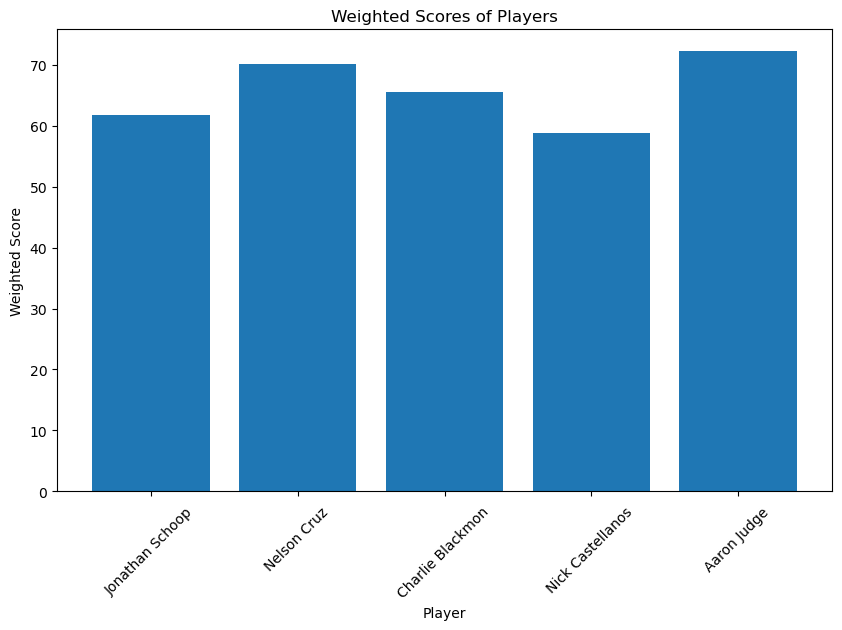

In [81]:
# Calculate weighted score for each player
battingFirstLastName['Score'] = (battingFirstLastName['HR'] * 0.3) + (battingFirstLastName['RBI'] * 0.3) + (battingFirstLastName['SB'] * 0.1) + (battingFirstLastName['BB'] * 0.1) + (battingFirstLastName['H'] * 0.1)

# Find the player with the highest score
best_player = battingFirstLastName.loc[battingFirstLastName['Score'].idxmax()]

# Print the best player
print("The most improved player is:", best_player['name'])
# Plot the weighted scores
plt.figure(figsize=(10, 6))
plt.bar(battingFirstLastName['name'], battingFirstLastName['Score'])
plt.xlabel('Player')
plt.ylabel('Weighted Score')
plt.title('Weighted Scores of Players')
plt.xticks(rotation=45)
plt.show()


But if we are just dealing with their "At Bats" the results are very different.

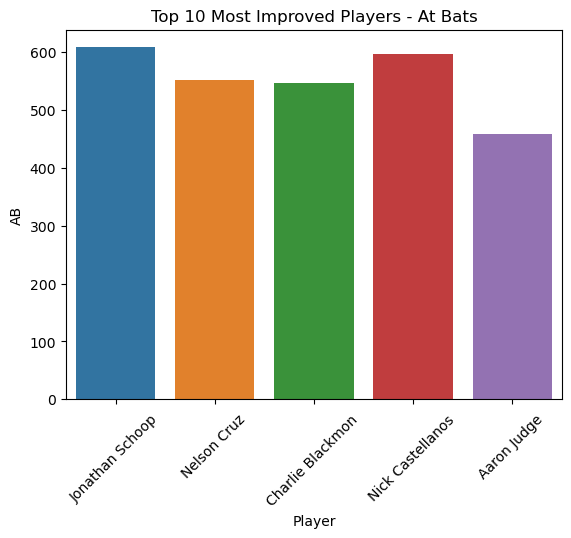

In [82]:
sns.barplot(data=battingFirstLastName, x='name', y='AB')
plt.xticks(rotation=45)
plt.xlabel('Player')
plt.ylabel('AB')
plt.title('Top 10 Most Improved Players - At Bats')
plt.show()


In [83]:
import pandas as pd

# Read the collegeplaying.csv file
college_playing = pd.read_csv('baseball/core/CollegePlaying.csv')

# Read the salaries.csv file
salaries = pd.read_csv('baseball/core/Salaries.csv')

# Merge the college_playing and salaries dataframes on the playerID column
merged_data = pd.merge(college_playing, salaries, on='playerID')

# Group the data by college and calculate the count of players for each college
college_players_count = merged_data.groupby('schoolID')['playerID'].nunique()

# Filter out schools with less than 5 players
valid_schools = college_players_count[college_players_count >= 10].index

# Filter the merged_data dataframe to include only valid schools
merged_data_filtered = merged_data[merged_data['schoolID'].isin(valid_schools)]

# Group the filtered data by college and calculate the sum of salaries for each college
college_salaries = merged_data_filtered.groupby('schoolID')['salary'].sum()
# display(college_salaries)

college_salaries = merged_data_filtered.groupby('schoolID')['salary'].mean()
# Read the Schools.csv file
schools = pd.read_csv('baseball/core/Schools.csv')
college_salaries = pd.merge(college_salaries, schools, left_on='schoolID', right_on='schoolID')
college_salaries = college_salaries.rename(columns={'name_full': 'school_name'})
college_salaries = college_salaries[['school_name', 'salary']]
college_salaries = college_salaries.sort_values(by='salary', ascending=False)
display(college_salaries.head(10))
display(college_salaries.tail(10))
display(college_salaries.size)





,school_name,salary
61,Missouri State University,4.506895e+06
25,Georgia Institute of Technology,4.121502e+06
68,"San Jacinto College, North Campus",3.801758e+06
33,California State University Long Beach,3.662576e+06
78,University of Washington,3.395569e+06
52,Oregon State University,2.891241e+06
41,Mississippi State University,2.860981e+06
40,University of Missouri Columbia,2.820569e+06
73,University of Southern California,2.805261e+06
46,The Ohio State University,2.784907e+06


,school_name,salary
42,North Carolina State University,778808.960630
69,Texas Tech University,759959.041237
51,Oral Roberts University,739615.170940
66,Blinn College,704782.258065
13,Orange Coast College,699895.152174
7,Cerritos College,647713.636364
27,University of Hawaii at Manoa,603896.387387
24,Middle Georgia College,581027.767857
65,Tulane University,548476.012346
16,Creighton University,384276.859504


162

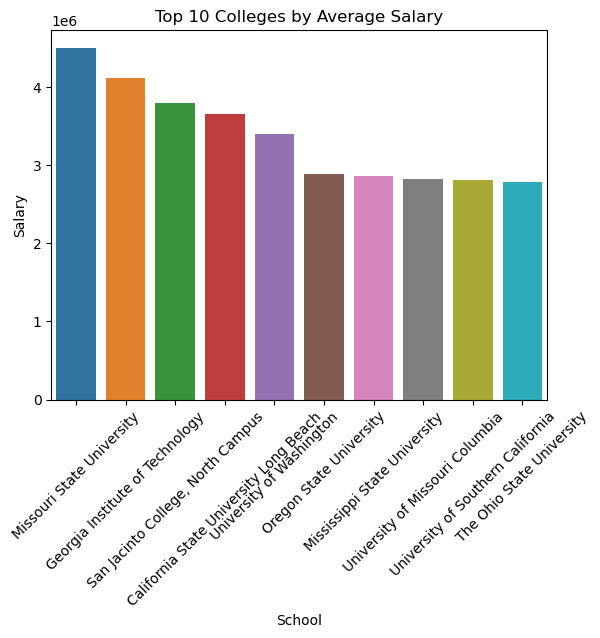

In [84]:
top_10_colleges = college_salaries.head(10)

sns.barplot(data=top_10_colleges, x='school_name', y='salary')
plt.xticks(rotation=45)
plt.xlabel('School')
plt.ylabel('Salary')
plt.title('Top 10 Colleges by Average Salary')
plt.show()






In [85]:
missouri = college_playing[college_playing['schoolID'] == 'missouri']
missouri
missouri_salaries = pd.merge(missouri, salaries, on='playerID')
missouri_salaries
missouri_with_names = pd.merge(missouri_salaries, people, on='playerID')
missouri_with_names.sort_values(by='salary', ascending=False)

,playerID,schoolID,yearID_x,yearID_y,teamID,lgID,salary,birthYear,birthMonth,birthDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
109,scherma01,missouri,2006,2016,WAS,NL,22142857,1984.0,7.0,27.0,...,Scherzer,Maxwell M.,210.0,75.0,R,R,2008-04-29,2017-09-30,schem001,scherma01
93,scherma01,missouri,2004,2016,WAS,NL,22142857,1984.0,7.0,27.0,...,Scherzer,Maxwell M.,210.0,75.0,R,R,2008-04-29,2017-09-30,schem001,scherma01
101,scherma01,missouri,2005,2016,WAS,NL,22142857,1984.0,7.0,27.0,...,Scherzer,Maxwell M.,210.0,75.0,R,R,2008-04-29,2017-09-30,schem001,scherma01
92,scherma01,missouri,2004,2015,WAS,NL,17142000,1984.0,7.0,27.0,...,Scherzer,Maxwell M.,210.0,75.0,R,R,2008-04-29,2017-09-30,schem001,scherma01
100,scherma01,missouri,2005,2015,WAS,NL,17142000,1984.0,7.0,27.0,...,Scherzer,Maxwell M.,210.0,75.0,R,R,2008-04-29,2017-09-30,schem001,scherma01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,ottoda01,missouri,1985,1990,OAK,AL,102000,1964.0,11.0,12.0,...,Otto,David Alan,210.0,79.0,L,L,1987-09-08,1994-08-10,ottod001,ottoda01
68,littlsc01,missouri,1983,1990,PIT,NL,100000,1963.0,1.0,19.0,...,Little,Dennis Scott,198.0,72.0,R,R,1989-07-27,1989-08-06,litts001,littlsc01
115,silveda01,missouri,1987,1993,NYA,AL,10900,1967.0,9.0,29.0,...,Silvestri,David Joseph,180.0,72.0,R,R,1992-04-27,1999-05-16,silvd001,silveda01
110,silveda01,missouri,1986,1993,NYA,AL,10900,1967.0,9.0,29.0,...,Silvestri,David Joseph,180.0,72.0,R,R,1992-04-27,1999-05-16,silvd001,silveda01


IDEAS:
- What player had the most improvement over his career?
- Are there correlations between who is winning the "allstar" and what team they are on?
- How often do players from certain colleges go to a certain MLB team?
- Defenitely something to do with the salaries table, maybe what how the top salaries did in college or something similar. 
- Who was the worst pitcher in the league over the years, and how bad was he comparitavely. 
- on base percentage
